In [1]:
import os
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%cd ../
from src import ROOT_DIR
%cd notebooks/

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/nazar/Projects/ukrainian_handwriting
/home/nazar/Projects/ukrainian_handwriting/notebooks


In [2]:
sns.set_theme(style='ticks')

# Small EDA and some visualizations

In [3]:
cleaned_df = pd.read_csv('../data/interim/data_cleaned.csv')
final_df = pd.read_csv('../data/processed/final.csv')

In [4]:
final_df.head()

,label,lbl_code,is_uppercase,filename
0,0,0,0,glyphs/0-0.png
1,0,0,0,glyphs/0-1.png
2,0,0,0,glyphs/0-2.png
3,0,0,0,glyphs/0-3.png
4,0,0,0,glyphs/0-4.png


In [5]:
print(f'Data contains {final_df.shape[0]} samples')
print(f'Data contains {len(final_df.label.unique())} classes')

Data contains 1581 samples
Data contains 43 classes


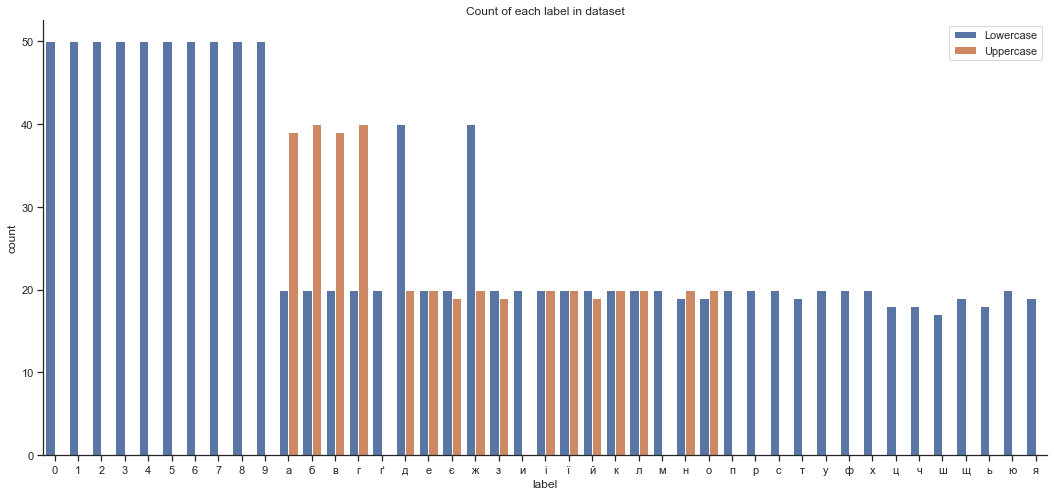

In [6]:
fig = plt.figure(figsize=(18, 8))
sns.countplot(x='label', hue='is_uppercase',
              data=final_df).set(title='Count of each label in dataset')
plt.legend(loc='upper right', labels=['Lowercase', 'Uppercase']);
sns.despine()

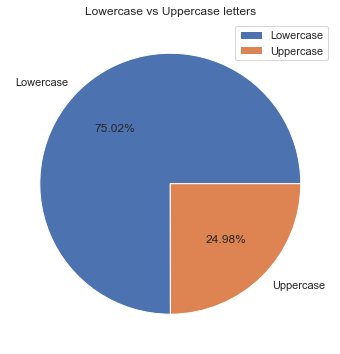

In [7]:
plt.figure(figsize=(6, 6))
plt.pie(final_df.is_uppercase.value_counts(),
        labels=('Lowercase', 'Uppercase'), autopct='%.2f%%')
plt.title('Lowercase vs Uppercase letters')
plt.legend();

In [8]:
labels = '0123456789абвгґдеєжзиіїйклмнопрстуфхцчшщьюя'

def visualize_samples(df, indices=None, title=None, src_dir=None, count=10):
    src_dir = src_dir if src_dir else 'data/processed'
    plt.figure(figsize=(count*2, 3))
    if not indices:
        indices = np.random.choice(np.arange(len(df)), count, replace=False)
    else:
        indices = indices[:count]
    if not title:
        title = f'{count} random samples from dataset'
    plt.suptitle(title, fontsize=16)
    for i, idx in enumerate(indices):
        row = df.iloc[idx]
        plt.subplot(1, count, i + 1)
        plt.title(f'Label: {row.label} | {labels.find(row.label)}')
        img_path = os.path.join(ROOT_DIR, src_dir, row.filename)
        plt.imshow(Image.open(img_path))
        plt.grid(False)
        plt.axis('off')

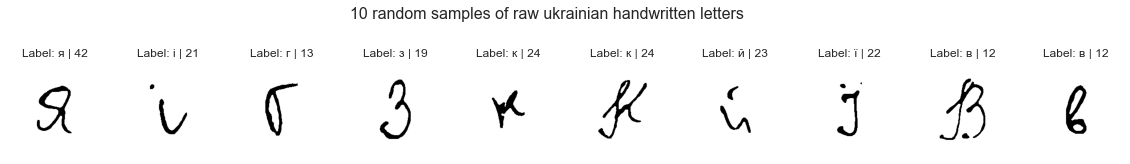

In [9]:
visualize_samples(cleaned_df, src_dir='data/raw',
                  title='10 random samples of raw ukrainian handwritten letters')

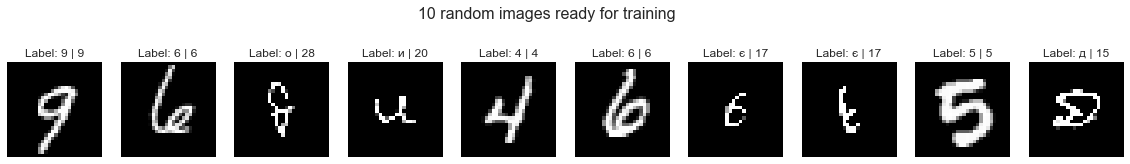

In [10]:
visualize_samples(final_df, title='10 random images ready for training');